<a href="https://colab.research.google.com/github/urfa10/MSIB_Data-Science/blob/main/MSIB_Tablet_Adoption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Busines Understanding
Richard sebagai online retailer ingin mengklasifikasi customer yang akan beli cepat, beli nanti, atau kapan-kapan. Dengan hal tersebut diharapkan dia dapat mengatur target pemasaran kepada customer yang tepat.

Supervised Learning --> Klasifikasi

Target variabel : tabletAdoption

- Decision Tree
- Random Forest
- Xboost classifer
- Logistic Regression
- SVM
class:
1. Innovator
2. Early Majority
3. Early Adopter
4. Late Majority


In [ ]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
load_tabbletadoption=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSource/Chapter10DataSet_Training.csv')

In [ ]:
df=pd.DataFrame(load_tabbletadoption)
df.head()

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   User_ID                    661 non-null    int64 
 1   Gender                     661 non-null    object
 2   Age                        661 non-null    int64 
 3   Marital_Status             661 non-null    object
 4   Website_Activity           661 non-null    object
 5   Browsed_Electronics_12Mo   661 non-null    object
 6   Bought_Electronics_12Mo    661 non-null    object
 7   Bought_Digital_Media_18Mo  661 non-null    object
 8   Bought_Digital_Books       661 non-null    object
 9   Payment_Method             661 non-null    object
 10  Tablet_Adoption            661 non-null    object
dtypes: int64(2), object(9)
memory usage: 56.9+ KB


Data tersebut banyak bertype string  sehingga pada pengolahan data akan diperlukan label encoder

In [ ]:
#Target variabel
df['Tablet_Adoption'].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: Tablet_Adoption, dtype: int64

In [ ]:
df.isnull().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

In [ ]:
df.isna().sum()

User_ID                      0
Gender                       0
Age                          0
Marital_Status               0
Website_Activity             0
Browsed_Electronics_12Mo     0
Bought_Electronics_12Mo      0
Bought_Digital_Media_18Mo    0
Bought_Digital_Books         0
Payment_Method               0
Tablet_Adoption              0
dtype: int64

#Data Preparation

In [ ]:
#Label encoder

from sklearn.preprocessing import LabelEncoder

# membuat instance dari LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df_input=pd.DataFrame({col:df[col].astype('category').cat.codes for col in df}, index=df.index)

In [ ]:
df_input.head(3)

,User_ID,Gender,Age,Marital_Status,Website_Activity,Browsed_Electronics_12Mo,Bought_Electronics_12Mo,Bought_Digital_Media_18Mo,Bought_Digital_Books,Payment_Method,Tablet_Adoption
0,599,1,45,0,2,1,1,1,0,0,3
1,388,1,11,0,1,1,0,1,0,0,2
2,178,0,13,0,2,1,1,1,1,0,0


In [ ]:
#Mengetahui hasil encoder dar field target
df_input['Tablet_Adoption'].value_counts()

0    205
1    186
3    172
2     98
Name: Tablet_Adoption, dtype: int64

0--> Early Adopter

1--> Early Majority

2--> Inovator

3--> Lead Majority



In [ ]:
#Pemodelan data
from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Input Varibael
x= df_input[['Gender','Age','Marital_Status','Website_Activity',	'Browsed_Electronics_12Mo',	'Bought_Electronics_12Mo'	,'Bought_Digital_Media_18Mo',	'Bought_Digital_Books',	'Payment_Method']]
#Target Variabel
y =df_input['Tablet_Adoption'].astype('category')

In [ ]:
#Spliting training dan testing, 70% training dan 30% tseting

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

##Decision Tree

In [ ]:
#Evaluation Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#membuat object algoritma decision tree klasifikasi
tree= DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6)
#memodelkan data menggunakan algortima decision tree
model_tree=tree.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_Tree=model_tree.predict(x_test)

gini meningkatkan rasion


##Evaluasi Model Decison Tree

In [ ]:
print(classification_report(y_test, pred_Tree))

              precision    recall  f1-score   support

           0       0.51      0.65      0.57        66
           1       0.70      0.33      0.45        57
           2       0.44      0.48      0.46        29
           3       0.69      0.81      0.75        47

    accuracy                           0.57       199
   macro avg       0.58      0.57      0.56       199
weighted avg       0.60      0.57      0.56       199



Terdapat Under fitting dan Over fitting

Text(113.9222222222222, 0.5, 'predicted label')

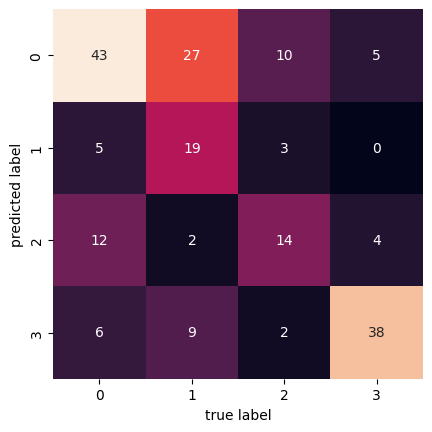

In [ ]:
# Visualize the confusion matrix of Decision Tree
mat = confusion_matrix (y_test, pred_Tree)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

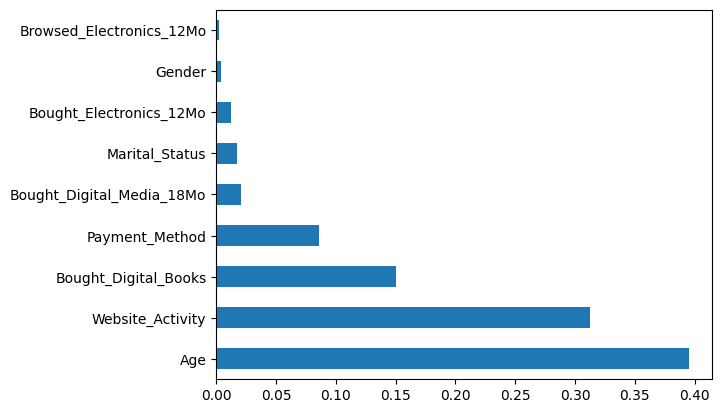

In [ ]:
#signifikan factor dari model tersebut yang menggambarkan nasabah gagal bayar/tidak
feat_importances = pd.Series(model_tree.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## K flod validation

K-Fload cross validation untuk menilai kinerja proses sebuah metode algoritma dengan membagi sampel data secara dan mengelompokkan data tersebut sebanyak nilai K-fload

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from sklearn.model_selection import cross_val_score

In [ ]:
scores= cross_val_score(model_tree, x, y, cv=10, scoring='f1_macro')

In [ ]:
scores

array([0.63668886, 0.68782051, 0.53085568, 0.60467775, 0.66891815,
       0.5323214 , 0.68611857, 0.60203036, 0.31814127, 0.23830011])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.55 accuracy with a standard deviation of 0.15


## Rndom Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#membuat object algoritma decision tree klasifikasi
clf_rf = RandomForestClassifier(n_estimators=200,max_depth=6)
#memodelkan data menggunakan algortima decision tree
model_rf=clf_rf.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_rf=model_rf.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        66
           1       0.74      0.46      0.57        57
           2       0.44      0.59      0.50        29
           3       0.70      0.79      0.74        47

    accuracy                           0.61       199
   macro avg       0.61      0.61      0.60       199
weighted avg       0.63      0.61      0.61       199



Text(113.9222222222222, 0.5, 'predicted label')

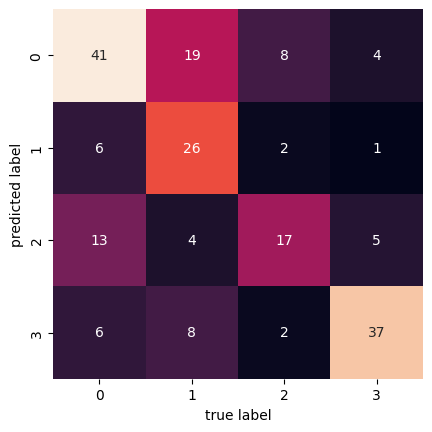

In [ ]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix (y_test, pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

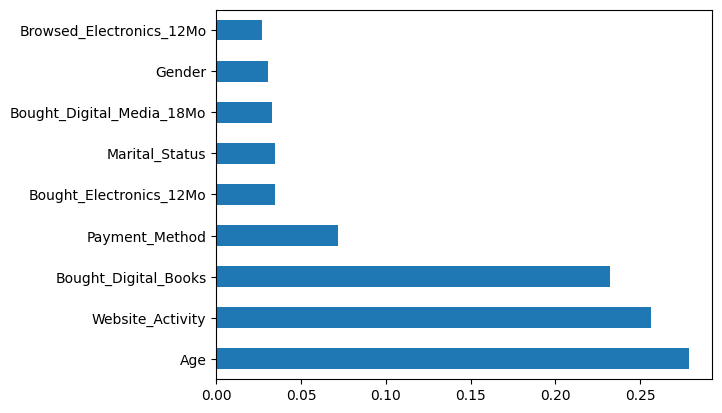

In [ ]:
#signifikan factor dari model tersebut yang menggambarkan nasabah gagal bayar/tidak
feat_importances = pd.Series(model_rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
scores= cross_val_score(model_rf, x, y, cv=15, scoring='f1_macro')
scores

array([0.72440171, 0.6232048 , 0.61418269, 0.71560847, 0.64071207,
       0.62222222, 0.57170619, 0.7543992 , 0.56223545, 0.59368687,
       0.77218615, 0.69039589, 0.43452381, 0.21106732, 0.1760082 ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.58 accuracy with a standard deviation of 0.17


## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#membuat object algoritma XGBOOST klasifikasi
clf_xg = XGBClassifier(n_estimators=200,max_depth=6)
#memodelkan data menggunakan algortima decision tree
model_xg=clf_xg.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_xg=model_xg.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_xg))

              precision    recall  f1-score   support

           0       0.55      0.48      0.52        66
           1       0.56      0.51      0.53        57
           2       0.43      0.55      0.48        29
           3       0.58      0.64      0.61        47

    accuracy                           0.54       199
   macro avg       0.53      0.55      0.53       199
weighted avg       0.54      0.54      0.54       199



Text(113.9222222222222, 0.5, 'predicted label')

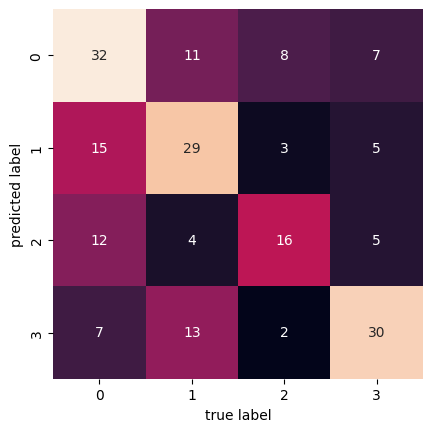

In [ ]:
# Visualize the confusion matrix of Random Forest
mat = confusion_matrix (y_test, pred_xg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

<Axes: >

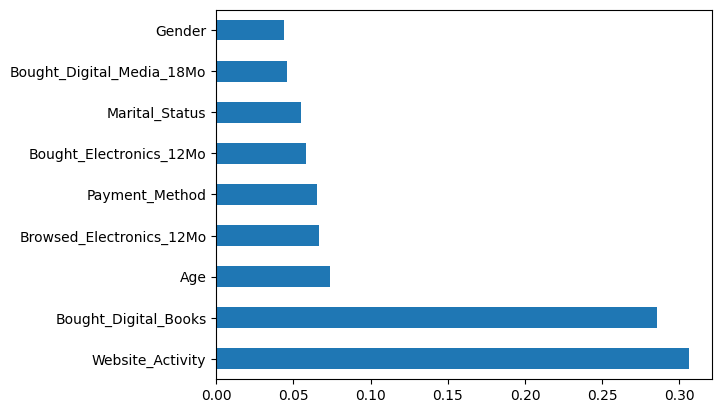

In [ ]:
feat_importances = pd.Series(model_xg.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
scores= cross_val_score(model_xg, x, y, cv=10, scoring='f1_macro')
scores

array([0.65180137, 0.71180556, 0.42271959, 0.24562226, 0.52248268,
       0.65309529, 0.75514866, 0.73449612, 0.29182331, 0.20108696])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.52 accuracy with a standard deviation of 0.20


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#membuat object algoritma Logistik Regression
clf_lg=LogisticRegression()
#memodelkan data menggunakan algortima Logistik Regression
model_lg=clf_lg.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_lg=model_lg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56        66
           1       0.55      0.30      0.39        57
           2       0.43      0.45      0.44        29
           3       0.62      0.81      0.70        47

    accuracy                           0.54       199
   macro avg       0.53      0.54      0.52       199
weighted avg       0.54      0.54      0.53       199



Text(113.9222222222222, 0.5, 'predicted label')

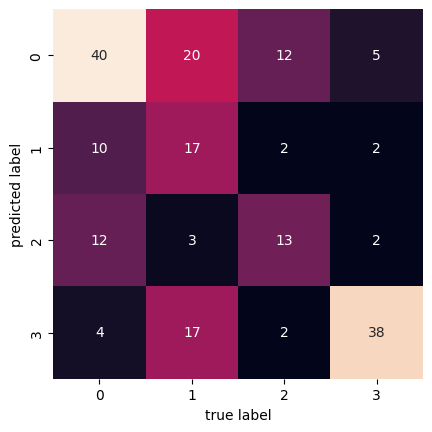

In [ ]:
mat = confusion_matrix (y_test, pred_lg)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
# import SVM
from sklearn.svm import SVC

In [ ]:
#membuat object algoritma Logistik SVM
clf_svm=SVC(kernel='linear', random_state=0)
#memodelkan data menggunakan algortima SVM
model_svm=clf_svm.fit(x_train, y_train)
#Melakukan prediksi pada data test
pred_svm=model_svm.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59        66
           1       0.66      0.54      0.60        57
           2       0.44      0.62      0.51        29
           3       0.71      0.74      0.73        47

    accuracy                           0.61       199
   macro avg       0.61      0.62      0.61       199
weighted avg       0.62      0.61      0.61       199



Text(113.9222222222222, 0.5, 'predicted label')

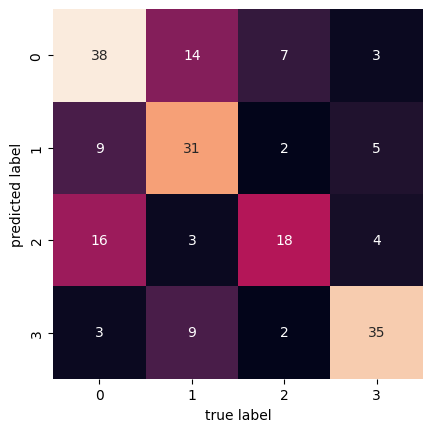

In [ ]:
# Visualize the confusion matrix of svm
mat = confusion_matrix (y_test, pred_svm)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('true label')
plt.ylabel('predicted label')